In [1]:
# Github Link: https://github.com/NhilbertJayValente/mp-2_Valente.git

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
# Load dataset
data = pd.read_csv('Advertising.csv')

# Standardize predictors (TV, Radio, Newspaper)
X = data[['TV', 'Radio', 'Newspaper']]
X_standardized = (X - X.mean()) / X.std()

# Add bias term (column of ones)
X_standardized.insert(0, 'Bias', 1)

# Response variable (Sales)
y = data['Sales'].values

# Train-test split (85% train, 15% test)
train_size = int(0.85 * len(X_standardized))
X_train, X_test = X_standardized[:train_size], X_standardized[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Training and Testing Data Prepared")

Training and Testing Data Prepared


In [4]:
# Define Functions
def initialize_weights(n, seed=42):
    """Randomly initialize weights."""
    np.random.seed(seed)
    return np.random.uniform(0, 1, size=(n, 1))

def predict(X, weights):
    """Generate predictions."""
    return np.dot(X, weights)

def compute_cost(X, y, weights):
    """Calculate the Mean Squared Error (MSE) cost."""
    m = len(y)
    predictions = predict(X, weights)
    errors = predictions - y.reshape(-1, 1)
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

def compute_gradient(X, y, weights):
    """Compute gradients."""
    m = len(y)
    predictions = predict(X, weights)
    errors = predictions - y.reshape(-1, 1)
    gradients = (1 / m) * np.dot(X.T, errors)
    return gradients

def update_weights(weights, gradients, learning_rate):
    """Update weights."""
    return weights - learning_rate * gradients

def grad_descent(X, y, weights, learning_rate, iterations):
    """Perform gradient descent."""
    cost_history = []
    for i in range(iterations):
        gradients = compute_gradient(X, y, weights)
        weights = update_weights(weights, gradients, learning_rate)
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost {cost:.5f}")
    return weights, cost_history

In [5]:
# Run Gradient Descent

# Initialize weights randomly
weights = initialize_weights(X_train.shape[1])

# Set learning rate and iterations
learning_rate = 0.01
iterations = 5000

# Run gradient descent
optimized_weights, cost_history = grad_descent(X_train.values, y_train, weights, learning_rate, iterations)
print("Optimized Weights:", optimized_weights.ravel())

Iteration 0: Cost 98.36117
Iteration 1000: Cost 1.40593
Iteration 2000: Cost 1.40593
Iteration 3000: Cost 1.40593
Iteration 4000: Cost 1.40593
Optimized Weights: [13.99978801  4.02263182  2.72156531 -0.05061818]


In [6]:
# Test different learning rates to observe their effect on cost convergence
learning_rates = [0.1, 0.01, 0.001]
for lr in learning_rates:
    print(f"\nTesting Learning Rate: {lr}")
    weights = initialize_weights(X_train.shape[1])  # Re-initialize weights for each test
    optimized_weights, cost_history = grad_descent(X_train.values, y_train, weights, lr, 5000)
    print(f"Final Cost for Learning Rate {lr}: {cost_history[-1]:.5f}")


Testing Learning Rate: 0.1
Iteration 0: Cost 81.40505
Iteration 1000: Cost 1.40593
Iteration 2000: Cost 1.40593
Iteration 3000: Cost 1.40593
Iteration 4000: Cost 1.40593
Final Cost for Learning Rate 0.1: 1.40593

Testing Learning Rate: 0.01
Iteration 0: Cost 98.36117
Iteration 1000: Cost 1.40593
Iteration 2000: Cost 1.40593
Iteration 3000: Cost 1.40593
Iteration 4000: Cost 1.40593
Final Cost for Learning Rate 0.01: 1.40593

Testing Learning Rate: 0.001
Iteration 0: Cost 100.14841
Iteration 1000: Cost 14.98631
Iteration 2000: Cost 3.37703
Iteration 3000: Cost 1.70416
Iteration 4000: Cost 1.45307
Final Cost for Learning Rate 0.001: 1.41383


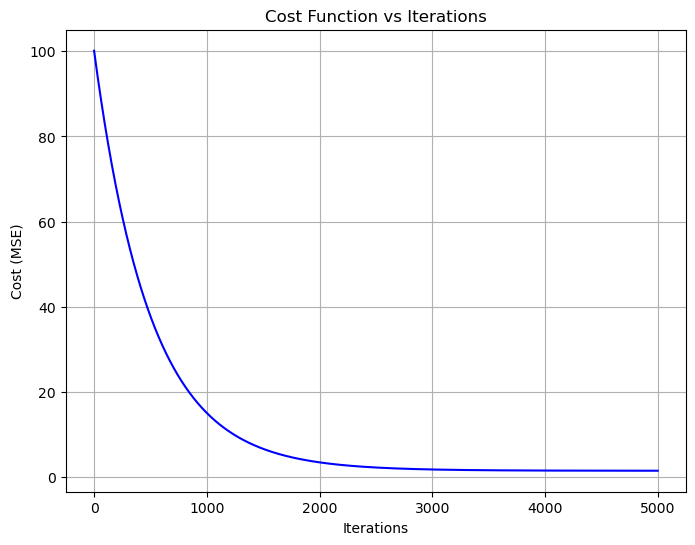

In [7]:
# Plot cost vs iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

In [8]:
# Predictions for train and test sets
y_pred_train = predict(X_train.values, optimized_weights)
y_pred_test = predict(X_test.values, optimized_weights)

# Calculate RMSE and R-squared
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f"Gradient Descent - RMSE (Train): {rmse_train:.2f}, R-squared (Train): {r2_train:.2f}")
print(f"Gradient Descent - RMSE (Test): {rmse_test:.2f}, R-squared (Test): {r2_test:.2f}")

Gradient Descent - RMSE (Train): 1.68, R-squared (Train): 0.89
Gradient Descent - RMSE (Test): 1.65, R-squared (Test): 0.92


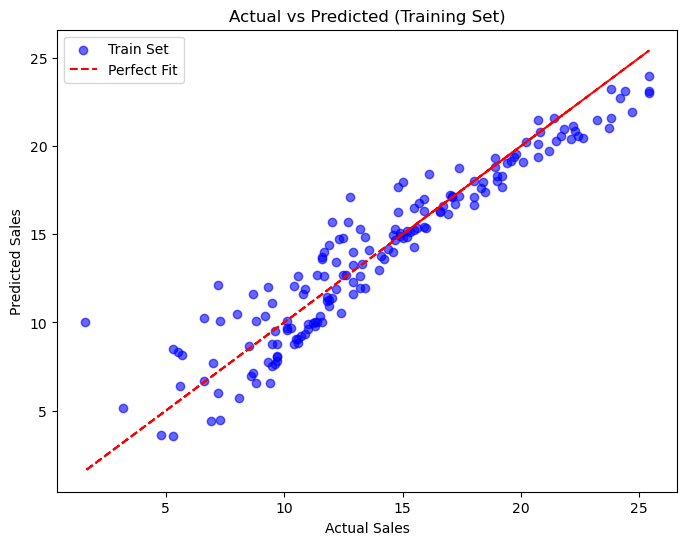

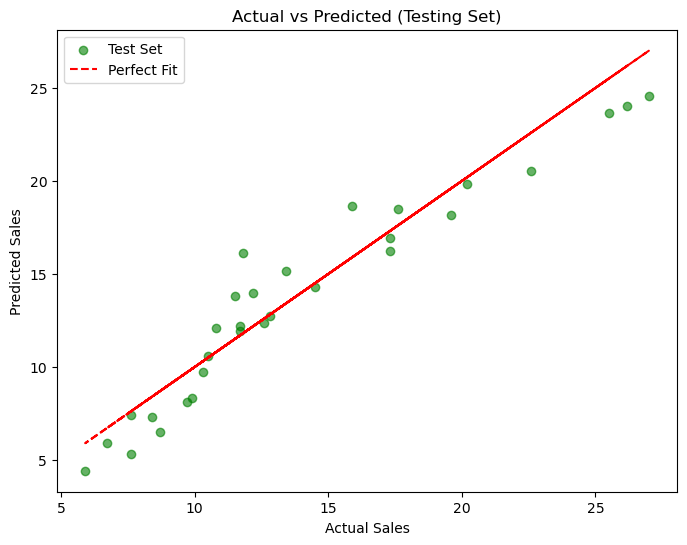

In [9]:
# Training set scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, label="Train Set")
plt.plot(y_train, y_train, color='red', linestyle='--', label="Perfect Fit")
plt.title("Actual vs Predicted (Training Set)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()

# Testing set scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', alpha=0.6, label="Test Set")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Fit")
plt.title("Actual vs Predicted (Testing Set)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()

In [10]:
# Train OLS model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Predictions
y_pred_train_ols = ols_model.predict(X_train)
y_pred_test_ols = ols_model.predict(X_test)

# OLS Metrics
rmse_train_ols = np.sqrt(mean_squared_error(y_train, y_pred_train_ols))
rmse_test_ols = np.sqrt(mean_squared_error(y_test, y_pred_test_ols))
r2_train_ols = r2_score(y_train, y_pred_train_ols)
r2_test_ols = r2_score(y_test, y_pred_test_ols)

# Print OLS results
print(f"OLS - RMSE (Train): {rmse_train_ols:.2f}, R-squared (Train): {r2_train_ols:.2f}")
print(f"OLS - RMSE (Test): {rmse_test_ols:.2f}, R-squared (Test): {r2_test_ols:.2f}")

OLS - RMSE (Train): 1.68, R-squared (Train): 0.89
OLS - RMSE (Test): 1.65, R-squared (Test): 0.92
